# Making a donut

Analytical equation for the stable rotation
$$
\mu_s (1 - \gamma) + \mu_d \gamma \sin \vartheta = \frac{R^{\prime}(\vartheta)}{R} \mu_d
$$
where $\mu_{s,d}$ are the static and dynamic friction coefficents, $R^{\prime}(\vartheta) = \sqrt{R^2 + L^2 + 2R L \sin \vartheta}$ is the radius of the rare wheel.

For $R \gg L$ we have 
$$
\vartheta \approx \arcsin \frac{\frac{\mu_s}{\mu_d} (1 - \gamma) - 1}{L/R - \gamma}
$$

The tangential speed is going to be
$$
v = \sqrt{\mu_d  g R^{\prime}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from icecream import ic

/tmp/ipykernel_175400/1357898418.py:17: RuntimeWarning: invalid value encountered in arcsin
  tehta_analytic_minus = np.arcsin( (C - 2*A*gamma - np.sqrt(4*B * gamma**2 + C**2 - 4*A*C*gamma)) / (2*gamma**2) )
ic| theta_analytic: (0.4164258973741848+0j)
    tehta_analytic_plus: 1.098285043354206
    tehta_analytic_minus: nan
    v_analytic * 3.6: 34.927590931801724


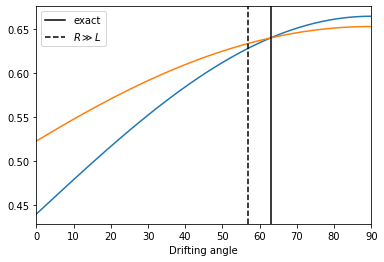

/tmp/ipykernel_175400/1357898418.py:51: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
/tmp/ipykernel_175400/1357898418.py:51: RuntimeWarning: divide by zero encountered in true_divide
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
/tmp/ipykernel_175400/1357898418.py:51: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
/tmp/ipykernel_175400/1357898418.py:52: RuntimeWarning: invalid value encountered in arcsin
  theta_approx = np.arcsin((mu_s/mu_d * (1 - gg) - 1) / (L/R - gg))


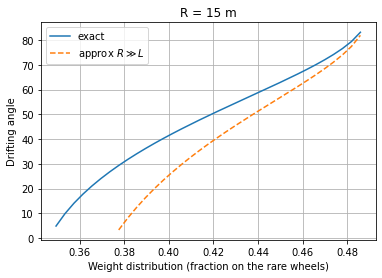

In [41]:
mu_s = 0.8
mu_d = 0.5

gamma = 0.45

R = 15
L = 4.6

theta = np.linspace(0, stop=np.pi/2, num=300)

theta_analytic_approx = np.arcsin( (mu_s/mu_d * (1 - gamma) - 1) / (L/R - gamma)  + 0.0j)

A = mu_s/mu_d * (1 - gamma)
B = 1 + (L/R)**2
C = 2*L/R
tehta_analytic_plus = np.arcsin( (C - 2*A*gamma + np.sqrt(4*B * gamma**2 + C**2 - 4*A*C*gamma)) / (2*gamma**2) )
tehta_analytic_minus = np.arcsin( (C - 2*A*gamma - np.sqrt(4*B * gamma**2 + C**2 - 4*A*C*gamma)) / (2*gamma**2) )
v_analytic = np.sqrt(mu_d * 9.8 * np.sqrt(R**2 + L**2 + 2 * R * L * np.sin(tehta_analytic_plus)))  # [m/s]

ic(
    theta_analytic, 
    tehta_analytic_plus,
    tehta_analytic_minus,
    v_analytic * 3.6
)

Rprime = np.sqrt(R**2 + L**2 + 2 * R * L * np.sin(theta))

left = mu_s * (1 - gamma) + mu_d * gamma * np.sin(theta)
right = Rprime/R * mu_d

plt.plot(theta * 180/np.pi, left)
plt.plot(theta * 180/np.pi, right)

plt.axvline(np.real(tehta_analytic_plus) * 180/np.pi, ls='-', c='k', label='exact')
plt.axvline(np.real(theta_analytic_approx) * 180/np.pi, ls='--', c='k', label='$R\gg L$')
plt.margins(x=0)
plt.legend()

plt.xlabel('Drifting angle')

plt.show()




gg = np.linspace(0, stop=1, num=250)
A = mu_s/mu_d * (1 - gg)
B = 1 + (L/R)**2
C = 2*L/R
theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
theta_approx = np.arcsin((mu_s/mu_d * (1 - gg) - 1) / (L/R - gg))

theta[theta < 0] = np.nan
theta_approx[theta_approx < 0] = np.nan 

plt.title('R = {} m'.format(R))
plt.plot(gg, theta*180/np.pi, label='exact')
plt.plot(gg, theta_approx*180/np.pi, ls='--', label='approx $R \gg L$')
plt.legend()

plt.grid()
plt.xlabel('Weight distribution (fraction on the rare wheels)')
plt.ylabel('Drifting angle')
plt.show()

/tmp/ipykernel_175400/440526019.py:11: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
/tmp/ipykernel_175400/440526019.py:11: RuntimeWarning: divide by zero encountered in true_divide
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
/tmp/ipykernel_175400/440526019.py:11: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )


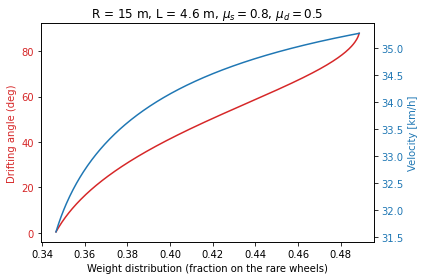

In [68]:
mu_s = 0.8
mu_d = 0.5
 
R = 15  # front wheel radius
L = 4.6  # car length

gg = np.linspace(0, stop=1, num=2500)
A = mu_s/mu_d * (1 - gg)
B = 1 + (L/R)**2
C = 2*L/R
theta = np.arcsin( (C - 2*A*gg + np.sqrt(4*B * gg**2 + C**2 - 4*A*C*gg)) / (2*gg**2) )
theta[theta < 0] = np.nan


Rprime = np.sqrt(R**2 + L**2 + 2 * R * L * np.sin(theta))
v = np.sqrt(mu_d * 9.8 * Rprime) * 3.6



fig, ax1 = plt.subplots()

ax1.set_title('R = {} m, L = {} m, $\mu_s = {}$, $\mu_d = {}$'.format(R, L, mu_s, mu_d))

color = 'tab:red'
ax1.set_xlabel('Weight distribution (fraction on the rare wheels)')
ax1.set_ylabel('Drifting angle (deg)', color=color)
ax1.plot(gg, theta*180/np.pi, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Velocity [km/h]', color=color)  # we already handled the x-label with ax1
ax2.plot(gg, v, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()